<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **Math for 4th grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
# deleting rows with no average math grade 4 score
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.dropna(subset=['ENROLL_4'], inplace=True)

In [5]:
#fill NaN values in instruction expenditure with mean values based on state
df.INSTRUCTION_EXPENDITURE = df.INSTRUCTION_EXPENDITURE.fillna(df.groupby(['STATE'])['INSTRUCTION_EXPENDITURE'].transform('mean'))

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [6]:
# instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **Instruction expenditure per student, Year, 4th grade enrollment**

Feature selection justification: **Out of all sources of expenditure, Instruction Expenditure seems the most closely related to a student's academic performance. It also looks like expenditure has been increasing with time, as have the student scores. Finally, the size of the batch seems a possible factor to look at as well.**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '4th grade math score over time')

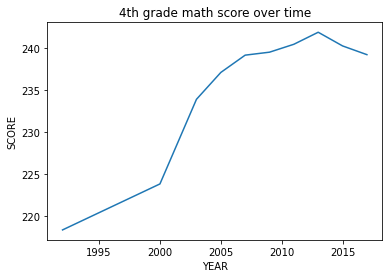

In [7]:
df.groupby('YEAR').AVG_MATH_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('4th grade math score over time')

**Changes in 4th grade Math scores over the years**

Visualization 2

Text(0.5, 1.0, 'Instruction Expenditure per student over time')

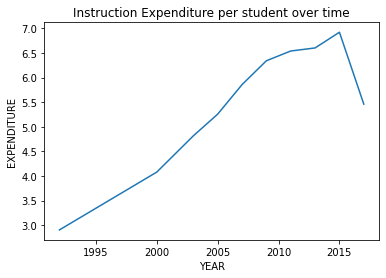

In [8]:
df.groupby('YEAR').INSTRUCTION_EXPENDITURE_PER_STUDENT.mean().plot()
plt.ylabel('EXPENDITURE')
plt.title('Instruction Expenditure per student over time')

**Changes in Instruction Expenditure over the years**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = X = df[['ENROLL_8','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [12]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [13]:
# create your model here
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix
#
#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Math 4 score')

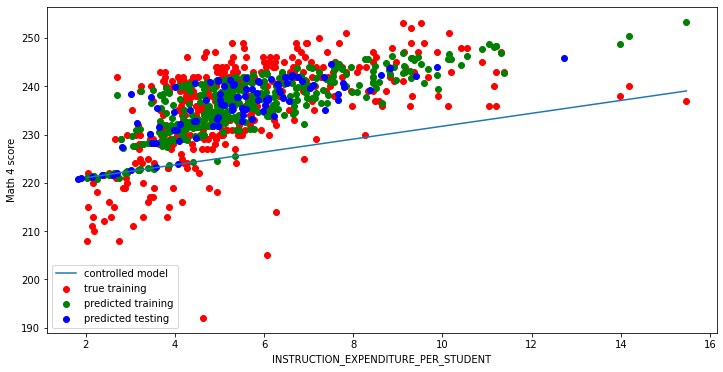

In [17]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')

In [18]:
print(model.intercept_)
print(model.coef_)
print(intercept)

-1066.004709981325
[-3.31510994e-06  1.33271724e+00  6.44874615e-01]
[218.39316482]


In [19]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.537876690679312

In [20]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.541518231934062

In [21]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

5.71407894915076

In [22]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

7.585934286295365

<h2> Summary </h2>

**Because I wanted to focus on grade 4 math scores, I removed any rows with NaN values in that column, as well as the ENROLL_4 column. The other important column here was INSTRUCTION_EXPENDITURE. Since schools in different states spend varying amounts on education (depending on population, and consequently enrollment numbers), I filled in the missing NaN expenditure values for each state depending on its mean value. Looking at the exploratory data analysis, both instruction expenditure and mean scores were increasing over time, indicating that there may be a relationship. Results from the regression learning model don't look encouraging, as mean errors are large and the R-squared value only indicated 51% accuracy. I changed the train:test ratio from 0.7:0.3 to 0.8:0.2 to see if it would make a significant improvement, but it only increased to ~53%, while the mean errors fluctuated around the same value. (I don't know how to interpret the intercept, sorry)**